In [21]:
from math import exp
import matplotlib.pyplot as plt

In [36]:
def visualize(f, f_label, g=None, g_label=''):
    xs = list(range(-128, 128))

    plt.plot(xs, [f(x) for x in xs], label=f_label)
    if g: plt.plot(xs, [g(x) for x in xs], label=g_label)
    plt.xlabel("x")
    plt.xticks(range(-128, 129, 32))
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.savefig(f"{f.__name__}.png")
    plt.show()

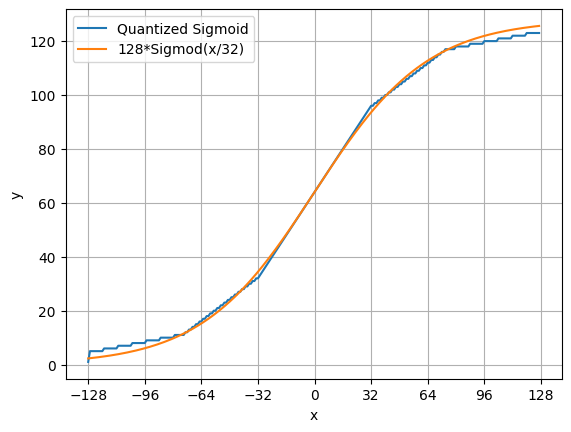

In [37]:
def q_sigmoid(x):
    if x <= -128: return 1
    if x <= -75:  return int(x/8) + 20
    if x <= -32:  return int(x/2) + 48
    if x <= 31:   return x + 64
    if x <= 74:   return int(x/2) + 80
    if x <= 127:  return int(x/8) + 108
    return 127

def sigmoid(x):
    return 1 / (1 + exp(-x))

visualize(q_sigmoid, "Quantized Sigmoid", lambda x: 128*sigmoid(x/32), "128*Sigmod(x/32)")

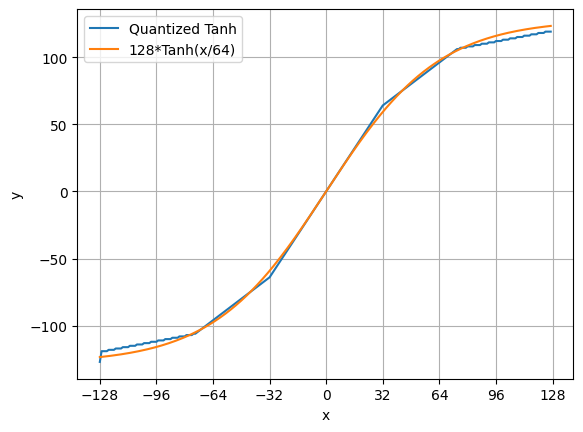

In [38]:
def q_tanh(x):
    if x <= -128: return -127
    if x <= -75:  return int(x/4) - 88
    if x <= -32:  return x - 32
    if x <= 31:   return 2*x
    if x <= 74:   return x + 32
    if x <= 127:  return int(x/4) + 88
    return 127

def tanh(x):
    return (exp(2*x) - 1) / (exp(2*x) + 1)

visualize(q_tanh, "Quantized Tanh", lambda x: 128*tanh(x/64), "128*Tanh(x/64)")

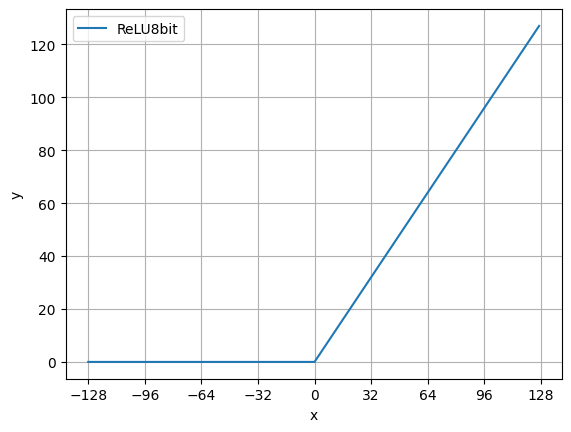

In [39]:
def q_relu(x):
    return min(max(0, x), 127)

visualize(q_relu, "ReLU8bit")